In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()

In [2]:
data = pd.read_csv("ecommerce-purchases.csv")
data.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [3]:
data.shape

(10000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [5]:
data.describe().round()

,Credit Card,CC Security Code,Purchase Price
count,1.000000e+04,10000.0,10000.0
mean,2.341374e+15,907.0,50.0
std,2.256103e+15,1590.0,29.0
min,6.040186e+10,0.0,0.0
25%,3.056322e+13,280.0,25.0
50%,8.699942e+14,548.0,51.0
75%,4.492298e+15,816.0,76.0
max,6.012000e+15,9993.0,100.0


In [6]:
data.isna().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data["Purchase Price"].mean()

50.347302

In [9]:
data[data["Language"]=="en"].count()

Address             1098
Lot                 1098
AM or PM            1098
Browser Info        1098
Company             1098
Credit Card         1098
CC Exp Date         1098
CC Security Code    1098
CC Provider         1098
Email               1098
Job                 1098
IP Address          1098
Language            1098
Purchase Price      1098
dtype: int64

In [10]:
data[data["Job"]=="Lawyer"].count()

Address             30
Lot                 30
AM or PM            30
Browser Info        30
Company             30
Credit Card         30
CC Exp Date         30
CC Security Code    30
CC Provider         30
Email               30
Job                 30
IP Address          30
Language            30
Purchase Price      30
dtype: int64

In [11]:
data["AM or PM"].value_counts()

AM or PM
PM    5068
AM    4932
Name: count, dtype: int64

In [12]:
data["Job"].value_counts().head()

Job
Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
Name: count, dtype: int64

In [13]:
data[(data["CC Provider"] == "American Express") & (data["Purchase Price"] > 95)]

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
9,"3795 Dawson Extensions\nLake Tinafort, ID 88739",15 Ug,AM,Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gec...,"Rivera, Buchanan and Ramirez",4396283918371,01/17,931,American Express,qcoleman@hunt-huerta.com,Forensic scientist,236.198.199.8,zh,95.63
280,81060 Dustin Causeway Apt. 503\nPort Danielche...,80 zh,PM,Mozilla/5.0 (Windows NT 5.01) AppleWebKit/5362...,Clay PLC,377737470673585,10/17,349,American Express,hfarley@hicks.com,Ergonomist,134.52.148.32,de,99.13
372,"359 Stanley Coves\nSalasfort, SD 59457",75 Ub,PM,Opera/8.42.(X11; Linux x86_64; en-US) Presto/2...,Davis-Lawrence,371995567939253,02/26,1877,American Express,amberhull@jones.net,Training and development officer,198.98.34.250,pt,99.08
677,"4855 Peter Bridge\nJohnsonberg, PA 90599-0009",62 Nx,AM,Opera/9.49.(Windows 98; Win 9x 4.90; en-US) Pr...,Jones and Sons,4960556611626434,07/26,9255,American Express,evanskayla@fernandez.com,Plant breeder/geneticist,235.97.240.112,el,98.97
766,"386 Alisha Unions\nSteelebury, ND 19782",28 pJ,PM,Opera/8.47.(X11; Linux x86_64; sl-SI) Presto/2...,Proctor PLC,30325623350308,04/24,772,American Express,robertsonjulia@gmail.com,"Therapist, art",146.208.30.83,es,96.66
1225,"916 Amanda Heights\nNew Johnland, CA 52112-8572",09 vg,PM,Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gec...,"Clark, Ross and Travis",371229555854245,10/21,366,American Express,lawrencecarter@kelly.com,Artist,88.49.59.205,pt,96.55
1381,"79284 Lisa Mews Suite 069\nKellyborough, CT 71...",45 MR,PM,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_5_5; r...,Randall-Cohen,4855262855037,05/17,518,American Express,maldonadomichael@martinez-delgado.info,Geophysical data processor,50.40.147.204,it,96.11
1385,"67796 James Keys Suite 656\nSouth Katieshire, ...",06 ia,PM,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/5330 ...,"Gonzalez, Gross and Allen",30407332938506,12/20,597,American Express,vbrown@daugherty.com,Geophysical data processor,152.133.246.191,zh,98.89
1568,"76108 Barker Manors\nEast Amy, PW 49544-5921",82 Qw,AM,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"Nguyen, Branch and Wiley",5142451859832464,04/21,785,American Express,johnsonjulie@yahoo.com,Insurance claims handler,175.248.232.126,es,97.04
1727,"478 Anita Hill Apt. 766\nAverymouth, FM 50629-...",94 qM,AM,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Owen and Sons,30242757909967,11/19,7403,American Express,sharpmelanie@smith-johnson.com,"Psychologist, prison and probation services",126.47.196.22,ru,95.58


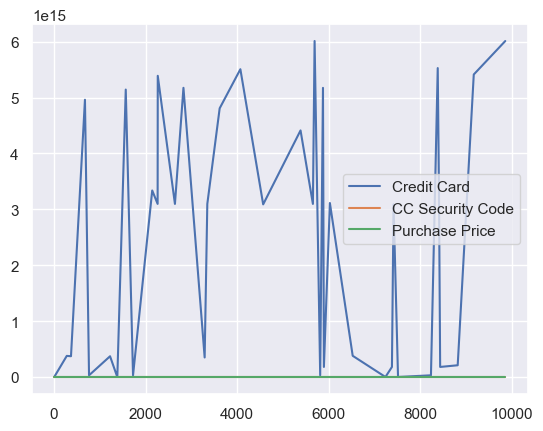

In [14]:
data[(data["CC Provider"] == "American Express") & (data["Purchase Price"] > 95)].plot();

<Axes: >

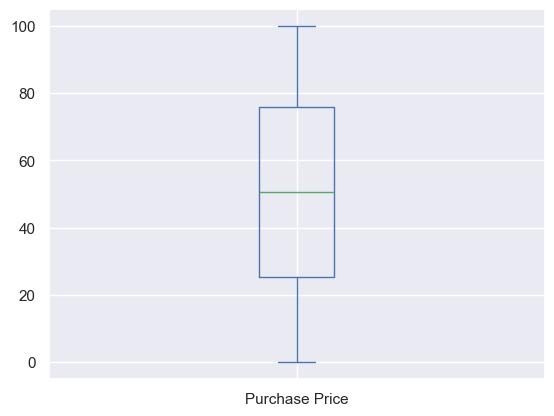

In [15]:
data["Purchase Price"].plot.box()

<Axes: xlabel='Language', ylabel='count'>

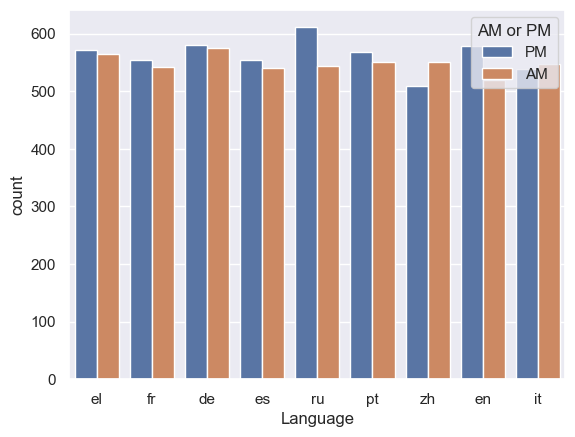

In [16]:
sns.countplot(x= data["Language"], hue =data["AM or PM"] )